<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week5/Exploratory%20data%20analysis/%20Car%20features%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Bagian ini mengimpor library yang diperlukan:
* pandas dan numpy untuk manipulasi data,
* matplotlib.pyplot dan seaborn untuk visualisasi,
* sklearn untuk membangun dan mengevaluasi model regresi.

In [41]:
df = pd.read_csv("/content/sample_data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


* membaca dataset dari file data.csv dan menampilkan beberapa baris pertama untuk memeriksa data yang dimuat.

In [15]:
# Menampilkan daftar kolom
print("Daftar Kolom dalam Dataset:\n", df.columns)

Daftar Kolom dalam Dataset:
 Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Make_Alfa Romeo',
       'Make_Aston Martin',
       ...
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon'],
      dtype='object', length=1072)


* menampilkan nama-nama kolom dalam dataset.

In [9]:
# 1. Exploratory Data Analysis (EDA)
# Menampilkan informasi dataset
print("Informasi Dataset:\n", df.info())
print("\nStatistik Deskriptif:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

* df.info() menampilkan informasi tentang dataset, termasuk jumlah baris, tipe data, dan jumlah nilai non-null di setiap kolom.
* df.describe() memberikan ringkasan statistik untuk kolom numerik seperti rata-rata, standar deviasi, dan kuartil.

In [10]:
# Menampilkan beberapa data teratas
print("\nBeberapa Data Teratas:\n", df.head())


Beberapa Data Teratas:
   Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performan

* menampilkan beberapa baris pertama data untuk melakukan pengecekan awal pada isi dataset.

In [11]:
# Mengecek apakah terdapat nilai null
print("\nNilai Null:\n", df.isnull().sum())


Nilai Null:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


* menghitung jumlah nilai kosong di setiap kolom

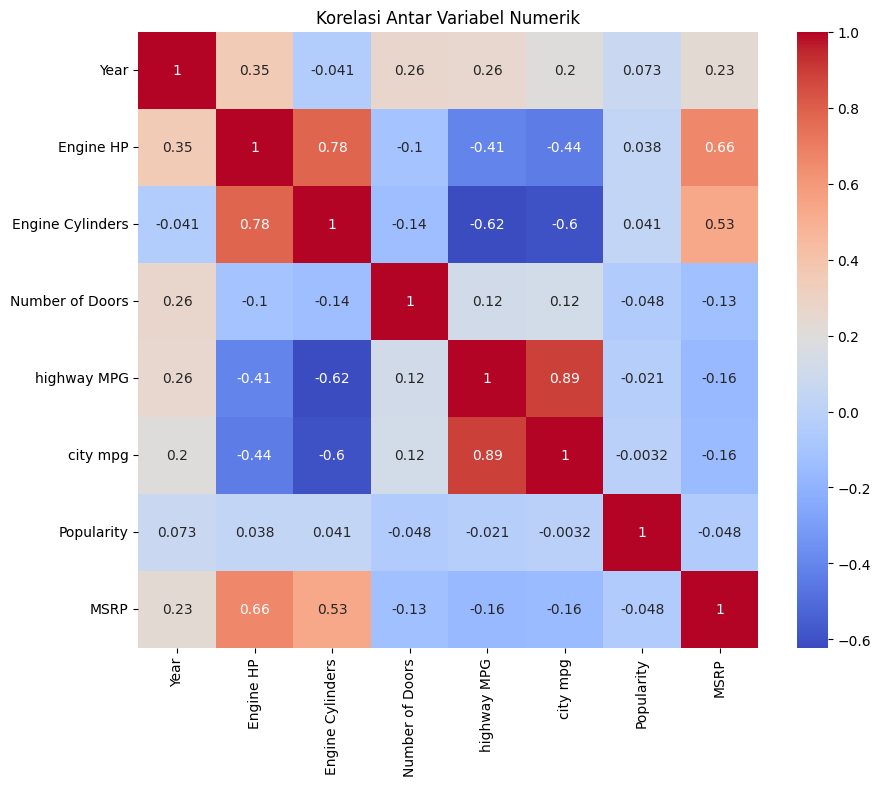

In [12]:
# Menampilkan korelasi antar variabel (Hanya kolom numerik)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Hanya memilih kolom numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

* membuat heatmap korelasi antar kolom numerik dalam dataset. Korelasi menunjukkan seberapa erat hubungan antara dua variabel. Nilai antara -1 dan 1 menunjukkan arah dan kekuatan hubungan; nilai mendekati 1 atau -1 menunjukkan hubungan yang kuat, sedangkan nilai mendekati 0 menunjukkan hubungan yang lemah. Korelasi ini berguna untuk mengidentifikasi fitur yang mungkin relevan dengan kolom target.

In [13]:
# Mengonversi kolom kategori menjadi variabel dummy
df = pd.get_dummies(df, drop_first=True)

* mengonversi kolom kategori menjadi variabel dummy (biner), yang dibutuhkan karena model machine learning biasanya tidak menerima tipe data kategori. drop_first=True menghindari masalah multikolinearitas dengan menghapus salah satu kategori sebagai referensi.

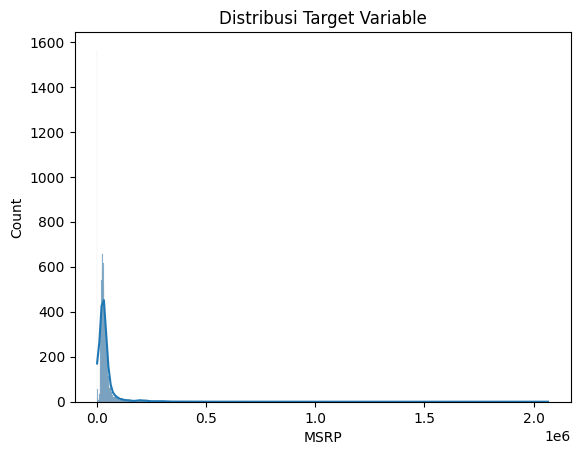

In [21]:
# Menampilkan distribusi dari target variable
sns.histplot(df['MSRP'], kde=True)
plt.title('Distribusi Target Variable')
plt.show()

* menampilkan histogram dari variabel target (MSRP) dengan garis distribusi (kde)

In [28]:
# Menghapus baris dengan nilai NaN
df = df.dropna()

* df.dropna(): Baris ini menghapus semua baris yang memiliki nilai NaN (missing values) dalam dataset.

In [29]:
# Mengisi nilai NaN dengan nilai rata-rata kolom
df.fillna(df.mean(), inplace=True)

* df.fillna(df.mean(), inplace=True): Baris ini mengisi nilai NaN yang tersisa dengan rata-rata kolom masing-masing.

In [31]:
# 2. Model Training
# Pilih fitur dan target
X = df[['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']]
y = df['MSRP']

* X: Variabel independen (fitur) yang digunakan untuk memprediksi harga MSRP (Manufacturer's Suggested Retail Price).
* y: Variabel dependen (target) yang merupakan nilai MSRP.

In [32]:
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* train_test_split: Fungsi ini membagi dataset menjadi dua bagian: data training (80%) dan data testing (20%). Parameter random_state memastikan bahwa pembagian ini dapat direproduksi.

In [33]:
# 3. Model Regresi Linear Biasa
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

* LinearRegression(): Membuat objek model regresi linear.
* fit(X_train, y_train): Melatih model menggunakan data training.

In [34]:
# Prediksi menggunakan model linear
y_pred_linear = linear_model.predict(X_test)

* predict(X_test): Menggunakan model untuk memprediksi nilai target pada data testing.

In [35]:
# Evaluasi Model Regresi Linear Biasa
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nEvaluasi Model Regresi Linear Biasa:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("MAE:", mae_linear)
print("R-squared:", r2_linear)


Evaluasi Model Regresi Linear Biasa:
MSE: 1067922194.6369007
RMSE: 32679.078852331513
MAE: 20579.489540062146
R-squared: 0.5519652436507736


* mean_squared_error: Menghitung MSE, yang mengukur rata-rata dari kuadrat kesalahan.
* np.sqrt(mse_linear): Menghitung RMSE (Root Mean Squared Error) untuk mendapatkan kesalahan dalam satuan yang sama dengan target.
* mean_absolute_error: Menghitung MAE (Mean Absolute Error) yang mengukur rata-rata kesalahan absolut.
* r2_score: Menghitung koefisien determinasi (R²) yang menunjukkan proporsi variasi target yang dapat dijelaskan oleh model.

In [42]:
# 4. Model Regresi Linear dengan Basis Fungsi (Polinomial)
poly = PolynomialFeatures(degree=2)  # degree bisa disesuaikan, misalnya 2 atau 3
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


* PolynomialFeatures(degree=2): Menghasilkan fitur polinomial dengan derajat 2 dari fitur input.
* fit_transform(X_train): Menerapkan transformasi pada data training.
* transform(X_test): Menerapkan transformasi yang sama pada data testing.

In [43]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

* Melatih model regresi linear pada data polinomial.

In [37]:
# Prediksi menggunakan model polinomial
y_pred_poly = poly_model.predict(X_poly_test)

* Memprediksi menggunakan model polinomial dan melakukan evaluasi dengan cara yang sama seperti model linear.

In [38]:
# Evaluasi Model Regresi Linear Berbasis Fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nEvaluasi Model Regresi Linear dengan Basis Fungsi (Polinomial):")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)
print("R-squared:", r2_poly)


Evaluasi Model Regresi Linear dengan Basis Fungsi (Polinomial):
MSE: 665337396.9294744
RMSE: 25794.134932760866
MAE: 15159.333478933031
R-squared: 0.7208651716198489


* mean_squared_error: Menghitung MSE (Mean Squared Error), yang mengukur rata-rata dari kuadrat kesalahan antara nilai yang diprediksi dan nilai aktual.
* np.sqrt(mse_poly): Menghitung RMSE (Root Mean Squared Error) untuk mendapatkan kesalahan dalam satuan yang sama dengan variabel target, memberikan interpretasi yang lebih intuitif mengenai kesalahan prediksi.
* mean_absolute_error: Menghitung MAE (Mean Absolute Error), yang mengukur rata-rata kesalahan absolut antara nilai yang diprediksi dan nilai aktual tanpa memperhitungkan arah kesalahan.
* r2_score: Menghitung koefisien determinasi (R²) yang menunjukkan proporsi variasi dalam variabel target yang dapat dijelaskan oleh model.

In [44]:
# 5. Perbandingan Hasil
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'MAE': [mae_linear, mae_poly],
    'R-squared': [r2_linear, r2_poly]
})


* Membuat DataFrame untuk membandingkan metrik evaluasi dari kedua model.


In [45]:
print("\nPerbandingan Hasil Model:")
print(results)


Perbandingan Hasil Model:
                   Model           MSE          RMSE           MAE  R-squared
0      Linear Regression  1.067922e+09  32679.078852  20579.489540   0.551965
1  Polynomial Regression  6.653374e+08  25794.134933  15159.333479   0.720865


* Mencetak perbandingan hasil antara model regresi linear biasa dan model regresi polinomial.